<a href="https://colab.research.google.com/github/Henriquerezer/FLAI-Cursos/blob/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Regressao_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/FLAI-Cursos/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Dados/marketing_campaign.csv', sep=';')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.iloc[:,0:20]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3


In [4]:
data = data.set_index('ID')
# COM ESSE COMANDO, ESTAREI NOMEANDO MINHA COLUNA 'ID' COMO INDÍCE DA MINHA TABELA.

In [5]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0


In [6]:
#Dessa forma poderei acessar cada cliente pelo número do ID ( Já que este número agora é o indice de cada linha)

data.loc[4001]

Year_Birth                   1946
Education                     PhD
Marital_Status           Together
Income                    64014.0
Kidhome                         2
Teenhome                        1
Dt_Customer            2014-06-10
Recency                        56
MntWines                      406
MntFruits                       0
MntMeatProducts                30
MntFishProducts                 0
MntSweetProducts                0
MntGoldProds                    8
NumDealsPurchases               7
NumWebPurchases                 8
NumCatalogPurchases             2
NumStorePurchases               5
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    1
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        0
Name: 4001, dtype: object

In [11]:
o_f2data = data

# A regressão logistica não trabalha bem com dados em escalas muito grandes, então devemos procurar métodos de diminuir estas escalas
# Iremos optar por extrair a idade do individuo, ao invés de utilizar o ano de seu nascimento

data.loc[:,'Idade'] = 2022 - data['Year_Birth'] #Criando uma nova coluna, subitraindo o ano de 2022 do ano de nascimento = Idade

# Data da primeira compra do cliente 'Dt_Customer', este valor está em uma escala muito complexa para se trabalhar
# vamos alterar ela para dias desde a primeira compra. Ao longo deste notebook iremos transformar estes dados
#neste momento estamos apenas dando um significado mais palpável para estas variaveis 

data.loc[:,'Primeira_Compra']  =  (pd.to_datetime('2022-08-01') - pd.to_datetime(data.Dt_Customer)).dt.days

# Jogando fora a coluna ano da primeira compra, pois não nos interessa 

data = data.drop(['Dt_Customer'], axis = 1)

# Jogando fora a coluna ano de nascimento, pois não nos interessa 

data = data.drop(['Year_Birth'], axis = 1)

In [12]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Idade,Primeira_Compra
ID,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,65,3618
2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,68,3068
4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,57,3267
6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,38,3094
5324,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,41,3116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,3,11,0,55,3336
4001,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,0,1,0,0,3,11,0,76,2974
7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,1,0,0,0,0,3,11,0,41,3110


# Separando em variável preditiva e variavel resposta


In [13]:
X = data.drop('Response', axis = 1)
y = data['Response']

# Separando em train_test_split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify = y)

In [15]:
possiveis_Education = pd.CategoricalDtype(['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ordered = True)
possiveis_Marital_Status = pd.CategoricalDtype(X_train.Marital_Status.unique())


possiveis_Education

CategoricalDtype(categories=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ordered=True)

In [16]:
possiveis_Marital_Status

CategoricalDtype(categories=['Married', 'Together', 'Divorced', 'Widow', 'Single',
                  'Absurd', 'Alone', 'YOLO'],
, ordered=False)

In [17]:
X_train.loc[:, 'Education'] = X_train.Education.astype(possiveis_Education)
X_test.loc[:, 'Education'] = X_test.Education.astype(possiveis_Education)

X_train.loc[:, 'Marital_Status'] = X_train.Education.astype(possiveis_Marital_Status)
X_test.loc[:, 'Marital_Status'] = X_test.Education.astype(possiveis_Marital_Status)

In [18]:
X_train.dtypes
# agora Education e MArital_Status, são categóricos. Antes eram objetos 

Education              category
Marital_Status         category
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Idade                     int64
Primeira_Compra           int64
dtype: object

In [19]:
X_train_dummies =  pd.get_dummies(X_train,columns=['Education', 'Marital_Status'], drop_first = True)
X_test_dummies =  pd.get_dummies(X_test,columns=['Education', 'Marital_Status'], drop_first = True)

In [20]:
X_test_dummies

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Together,Marital_Status_Divorced,Marital_Status_Widow,Marital_Status_Single,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,
3277,49431.0,0,1,9,219,3,100,26,0,17,...,1,0,0,0,0,0,0,0,0,0
4943,70503.0,0,0,73,1379,33,216,0,33,66,...,1,0,0,0,0,0,0,0,0,0
1071,70179.0,0,1,10,532,88,168,69,44,133,...,0,0,1,0,0,0,0,0,0,0
3697,39898.0,0,1,20,69,8,26,12,7,12,...,1,0,0,0,0,0,0,0,0,0
9986,19444.0,1,0,8,16,0,23,3,2,10,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,71819.0,0,1,70,1224,28,140,0,14,168,...,1,0,0,0,0,0,0,0,0,0
793,20895.0,1,0,24,18,3,17,3,0,4,...,1,0,0,0,0,0,0,0,0,0
7736,22518.0,1,0,36,11,7,12,2,2,27,...,1,0,0,0,0,0,0,0,0,0


In [21]:
X_test_dummies.isnull().sum()

Income                     3
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Idade                      0
Primeira_Compra            0
Education_2n Cycle         0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Together    0
Marital_Status_Divorced    0
Marital_Status_Widow       0
Marital_Status_Single      0
Marital_Status_Absurd      0
Marital_Status

In [22]:
X_train_dummies.isnull()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Together,Marital_Status_Divorced,Marital_Status_Widow,Marital_Status_Single,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,
10821,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4084,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6983,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10402,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8977,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
X_train_dummies.isnull().sum()

Income                     21
Kidhome                     0
Teenhome                    0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Z_CostContact               0
Z_Revenue                   0
Idade                       0
Primeira_Compra             0
Education_2n Cycle          0
Education_Graduation        0
Education_Master            0
Education_PhD               0
Marital_Status_Together     0
Marital_Status_Divorced     0
Marital_Status_Widow        0
Marital_Status_Single       0
Marital_St

In [24]:
#Filtrando por falores faltantes, neste caso estou filtrando por falores igual a 0.
#Vejo que não tenho nenhum valor faltante, pois o shape dos dados chegue igual
X_train_dummies.fillna(0)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Together,Marital_Status_Divorced,Marital_Status_Widow,Marital_Status_Single,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,
10821,57113.0,1,1,45,182,4,33,0,2,42,...,1,0,0,0,0,0,0,0,0,0
5680,35684.0,1,0,66,10,4,7,0,6,3,...,0,0,0,0,0,0,0,0,0,0
4084,60934.0,0,1,41,224,155,155,192,93,54,...,1,0,0,0,0,0,0,0,0,0
6983,38054.0,1,1,24,23,2,17,2,1,0,...,0,1,0,0,0,0,0,0,0,0
8233,64866.0,0,1,9,508,5,21,7,5,10,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,37697.0,1,0,82,34,6,21,11,4,8,...,1,0,0,0,0,0,0,0,0,0
10402,35441.0,1,1,94,25,1,9,2,1,1,...,1,0,0,0,0,0,0,0,0,0
8977,16581.0,0,0,51,1,3,4,2,3,11,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_train_dummies['Income'].median()

51250.0

In [26]:
# Vamos imputar esse valor mediano, no lugar dos valores faltantes desta classe 

valor_para_imputar = X_train_dummies['Income'].median()

X_train_dummies.loc[X_train_dummies['Income'].isnull(), 'Income'] = valor_para_imputar
X_test_dummies.loc[X_test_dummies['Income'].isnull(), 'Income'] = valor_para_imputar

In [27]:
X_train_dummies

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Together,Marital_Status_Divorced,Marital_Status_Widow,Marital_Status_Single,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,
10821,57113.0,1,1,45,182,4,33,0,2,42,...,1,0,0,0,0,0,0,0,0,0
5680,35684.0,1,0,66,10,4,7,0,6,3,...,0,0,0,0,0,0,0,0,0,0
4084,60934.0,0,1,41,224,155,155,192,93,54,...,1,0,0,0,0,0,0,0,0,0
6983,38054.0,1,1,24,23,2,17,2,1,0,...,0,1,0,0,0,0,0,0,0,0
8233,64866.0,0,1,9,508,5,21,7,5,10,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,37697.0,1,0,82,34,6,21,11,4,8,...,1,0,0,0,0,0,0,0,0,0
10402,35441.0,1,1,94,25,1,9,2,1,1,...,1,0,0,0,0,0,0,0,0,0
8977,16581.0,0,0,51,1,3,4,2,3,11,...,0,0,0,0,0,0,0,0,0,0


Neste momento preciso converter meus dados em variáveis compativeis com o modelo.

# Opção 1: Escalar as variáveis antes de fazer a interação

In [28]:
X_train_dummies.max()

Income                     666666.0
Kidhome                         2.0
Teenhome                        2.0
Recency                        99.0
MntWines                     1493.0
MntFruits                     199.0
MntMeatProducts              1725.0
MntFishProducts               259.0
MntSweetProducts              263.0
MntGoldProds                  362.0
NumDealsPurchases              15.0
NumWebPurchases                27.0
NumCatalogPurchases            28.0
NumStorePurchases              13.0
NumWebVisitsMonth              20.0
AcceptedCmp3                    1.0
AcceptedCmp4                    1.0
AcceptedCmp5                    1.0
AcceptedCmp1                    1.0
AcceptedCmp2                    1.0
Complain                        1.0
Z_CostContact                   3.0
Z_Revenue                      11.0
Idade                         122.0
Primeira_Compra              3654.0
Education_2n Cycle              1.0
Education_Graduation            1.0
Education_Master            

In [29]:
from sklearn.preprocessing import StandardScaler

#Esse método ira tornar a media das variaveis igual a 0 e o desvio-padrão igual a 1
#Maior parte dos dados estará entre -1 e 1
#Este tipo de escalador, é interessante quando não temos uma váriavel em uma  escala MUITOOO MAIOR
# Por exemplo nesta variavel "Income", se tivermos 1 pessoa que ganha Mil reias e outra que ganha 1 Milhão
#StandartScaler não é o ideal

numericas = [
    'Income',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Idade',
    'Primeira_Compra'
]

scalers = {}
X_train_s = X_train_dummies.copy()
X_test_s  = X_test_dummies.copy()

for col in numericas:
  scaler = StandardScaler()
  scaler.fit(X_train_s[[col]])
  X_train_s.loc[:,col] = scaler.transform(X_train_s[[col]])
  X_test_s.loc[:,col] = scaler.transform(X_test_s[[col]])
  scalers[col] = scaler

X_train_s

#Fazendo desta forma, utilizando o for, estarei aplicando o escalador, coluna por coluna, assim manterei a rastreabilidade dos dados 
# Caso eu aplique em toda a base de dados, o método irá me retornar uma matriz numpy
# E não sabarei qual a relação de cada dado
#Lembrando que aplicamos o escalador, apenas nas variáeis numéricas

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Together,Marital_Status_Divorced,Marital_Status_Widow,Marital_Status_Single,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,
10821,0.185578,1,1,-0.147271,-0.360997,-0.558902,-0.594091,-0.683659,-0.599554,-0.040995,...,1,0,0,0,0,0,0,0,0,0
5680,-0.622211,1,0,0.572107,-0.872459,-0.558902,-0.708024,-0.683659,-0.503604,-0.776808,...,0,0,0,0,0,0,0,0,0,0
4084,0.329615,0,1,-0.284295,-0.236105,3.276643,-0.059482,2.772880,1.583325,0.185409,...,1,0,0,0,0,0,0,0,0,0
6983,-0.532872,1,1,-0.866649,-0.833802,-0.609704,-0.664204,-0.647653,-0.623542,-0.833409,...,0,1,0,0,0,0,0,0,0,0
8233,0.477836,0,1,-1.380490,0.608403,-0.533501,-0.646676,-0.557639,-0.527591,-0.644739,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,-0.546329,1,0,1.120205,-0.801093,-0.508100,-0.646676,-0.485628,-0.551579,-0.682473,...,1,0,0,0,0,0,0,0,0,0
10402,-0.631372,1,1,1.531278,-0.827855,-0.635105,-0.699260,-0.647653,-0.623542,-0.814542,...,1,0,0,0,0,0,0,0,0,0
8977,-1.342320,0,0,0.058266,-0.899222,-0.584303,-0.721171,-0.647653,-0.575567,-0.625872,...,0,0,0,0,0,0,0,0,0,0


# Opção 2: Convertendo categóricas ordinais

In [30]:
from sklearn.preprocessing import KBinsDiscretizer

scalers_o = {}
X_train_o = X_train_dummies.copy()
X_test_o  = X_test_dummies.copy()

for col in numericas:
  scaler = KBinsDiscretizer(n_bins = 5, encode = 'ordinal')
  scaler.fit(X_train_o[[col]])
  X_train_o.loc[:,col] = scaler.transform(X_train_o[[col]])
  X_test_o.loc[:,col] = scaler.transform(X_test_o[[col]])
  scalers_o[col] = scaler

X_train_o

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Together,Marital_Status_Divorced,Marital_Status_Widow,Marital_Status_Single,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,
10821,2.0,1,1,2.0,2.0,2.0,1.0,0.0,1.0,3.0,...,1,0,0,0,0,0,0,0,0,0
5680,1.0,1,0,3.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4084,3.0,0,1,2.0,2.0,4.0,3.0,4.0,4.0,3.0,...,1,0,0,0,0,0,0,0,0,0
6983,1.0,1,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
8233,3.0,0,1,0.0,3.0,2.0,1.0,2.0,2.0,1.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,1.0,1,0,4.0,1.0,2.0,1.0,2.0,2.0,1.0,...,1,0,0,0,0,0,0,0,0,0
10402,1.0,1,1,4.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0
8977,0.0,0,0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


# Converter tudo em one-hot (dummy)

In [31]:
X_train_k = X_train_dummies.copy()
X_test_k  = X_test_dummies.copy()
scaler = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy = 'quantile')
scaler.fit(X_train_k[['Income']])
scaler.transform(X_train_k[['Income']])

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

**como criar um código que mantém o rastreio**

In [32]:
scaler.fit(X_train_k[['Income']])
scaler.bin_edges_

array([array([  1730. ,  31716. ,  44678.2,  57957.4,  71562. , 666666. ])],
      dtype=object)

In [33]:
novas_colunas = []
for comeco in scaler.bin_edges_[0][:-1]:
  novas_colunas.append(f'Income_{comeco:.1f}')

novas_colunas

['Income_1730.0',
 'Income_31716.0',
 'Income_44678.2',
 'Income_57957.4',
 'Income_71562.0']

In [34]:
auxiliar = pd.DataFrame(scaler.transform(X_train_k[['Income']]), columns = novas_colunas, index=X_train_k.index)

In [35]:
X_train_k.join(auxiliar)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Widow,Marital_Status_Single,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_YOLO,Income_1730.0,Income_31716.0,Income_44678.2,Income_57957.4,Income_71562.0
ID,,,,,,,,,,,,,,,,,,,,,
10821,57113.0,1,1,45,182,4,33,0,2,42,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
5680,35684.0,1,0,66,10,4,7,0,6,3,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
4084,60934.0,0,1,41,224,155,155,192,93,54,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0
6983,38054.0,1,1,24,23,2,17,2,1,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
8233,64866.0,0,1,9,508,5,21,7,5,10,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,37697.0,1,0,82,34,6,21,11,4,8,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
10402,35441.0,1,1,94,25,1,9,2,1,1,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
8977,16581.0,0,0,51,1,3,4,2,3,11,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.preprocessing import KBinsDiscretizer

scalers_k = {}
X_train_k = X_train_dummies.copy()
X_test_k  = X_test_dummies.copy()

for col in numericas:
  scaler = KBinsDiscretizer(n_bins = 5, encode = 'onehot-dense', strategy = 'quantile')
  scaler.fit(X_train_k[[col]])
  novas_colunas = []
  for comeco in scaler.bin_edges_[0][:-1]:
    novas_colunas.append(f'{col}_{comeco}')

  novas_colunas


  auxiliar = pd.DataFrame(scaler.transform(X_train_k[[col]]), columns = novas_colunas, index=X_train_k.index)
  X_train_k = X_train_k.join(auxiliar)

  auxiliar = pd.DataFrame(scaler.transform(X_test_k[[col]]), columns = novas_colunas, index=X_test_k.index)
  X_test_k = X_test_k.join(auxiliar)
  scalers_k[col] = scaler
  X_train_k = X_train_k.drop(col, axis = 1 )
  X_test_k = X_test_k.drop(col, axis = 1 )
X_train_k

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,...,Idade_26.0,Idade_43.0,Idade_49.0,Idade_56.0,Idade_64.0,Primeira_Compra_2955.0,Primeira_Compra_3102.0,Primeira_Compra_3246.0,Primeira_Compra_3389.0,Primeira_Compra_3524.6000000000004
ID,,,,,,,,,,,,,,,,,,,,,
10821,1,1,0,0,0,0,0,0,3,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5680,1,0,0,0,0,0,0,0,3,11,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4084,0,1,0,0,0,0,0,0,3,11,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6983,1,1,0,0,0,0,0,0,3,11,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8233,0,1,0,1,0,0,0,0,3,11,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,1,0,0,0,0,0,0,0,3,11,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10402,1,1,0,0,0,0,0,0,3,11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8977,0,0,0,0,0,0,0,0,3,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Independente do mecanismo escolhido, agora podemos fazer (ou não) as interações de variáveis

In [37]:
from sklearn.preprocessing import PolynomialFeatures

polyfeats = PolynomialFeatures(degree = 2, include_bias = False)
polyfeats.fit(X_train_s)

polyfeats.transform(X_train_s)

array([[ 0.18557805,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.62221148,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.32961481,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.34231991,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.45156128,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.22964439,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [38]:
polyfeats.transform(X_train_s).shape

(1568, 702)

In [39]:
polyfeats.powers_

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 2]])

In [40]:
from sklearn.preprocessing import PolynomialFeatures
polyfeats =  PolynomialFeatures(degree = 2, include_bias = False)
polyfeats.fit(X_train_s)
new_cols=[
     '*'.join([
        f'{col}^{num}' for num,col in zip(powers,X_train_s.columns)if num != 0
     ]).strip('*')
    for powers in polyfeats.powers_
]

X_train_f = pd.DataFrame(polyfeats.transform(X_train_s),columns=new_cols, index = X_train_s.index)
X_test_f = pd.DataFrame(polyfeats.transform(X_test_s),columns = new_cols, index = X_test_s.index)
X_train_f

,Income^1,Kidhome^1,Teenhome^1,Recency^1,MntWines^1,MntFruits^1,MntMeatProducts^1,MntFishProducts^1,MntSweetProducts^1,MntGoldProds^1,...,Marital_Status_Single^2,Marital_Status_Single^1*Marital_Status_Absurd^1,Marital_Status_Single^1*Marital_Status_Alone^1,Marital_Status_Single^1*Marital_Status_YOLO^1,Marital_Status_Absurd^2,Marital_Status_Absurd^1*Marital_Status_Alone^1,Marital_Status_Absurd^1*Marital_Status_YOLO^1,Marital_Status_Alone^2,Marital_Status_Alone^1*Marital_Status_YOLO^1,Marital_Status_YOLO^2
ID,,,,,,,,,,,,,,,,,,,,,
10821,0.185578,1.0,1.0,-0.147271,-0.360997,-0.558902,-0.594091,-0.683659,-0.599554,-0.040995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5680,-0.622211,1.0,0.0,0.572107,-0.872459,-0.558902,-0.708024,-0.683659,-0.503604,-0.776808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4084,0.329615,0.0,1.0,-0.284295,-0.236105,3.276643,-0.059482,2.772880,1.583325,0.185409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6983,-0.532872,1.0,1.0,-0.866649,-0.833802,-0.609704,-0.664204,-0.647653,-0.623542,-0.833409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8233,0.477836,0.0,1.0,-1.380490,0.608403,-0.533501,-0.646676,-0.557639,-0.527591,-0.644739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,-0.546329,1.0,0.0,1.120205,-0.801093,-0.508100,-0.646676,-0.485628,-0.551579,-0.682473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10402,-0.631372,1.0,1.0,1.531278,-0.827855,-0.635105,-0.699260,-0.647653,-0.623542,-0.814542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8977,-1.342320,0.0,0.0,0.058266,-0.899222,-0.584303,-0.721171,-0.647653,-0.575567,-0.625872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Algumas interações não fazem sentido

In [41]:
X_train_f.max() - X_train_f.min()

Income^1                                          25.065488
Kidhome^1                                          2.000000
Teenhome^1                                         2.000000
Recency^1                                          3.391353
MntWines^1                                         4.439613
                                                    ...    
Marital_Status_Absurd^1*Marital_Status_Alone^1     0.000000
Marital_Status_Absurd^1*Marital_Status_YOLO^1      0.000000
Marital_Status_Alone^2                             0.000000
Marital_Status_Alone^1*Marital_Status_YOLO^1       0.000000
Marital_Status_YOLO^2                              0.000000
Length: 702, dtype: float64

In [42]:
const_cols = X_train_f.columns[(X_train_f.max() - X_train_f.min()) == 0]
const_cols

Index(['Z_CostContact^1', 'Z_Revenue^1', 'Marital_Status_Together^1',
       'Marital_Status_Divorced^1', 'Marital_Status_Widow^1',
       'Marital_Status_Single^1', 'Marital_Status_Absurd^1',
       'Marital_Status_Alone^1', 'Marital_Status_YOLO^1',
       'Income^1*Marital_Status_Together^1',
       ...
       'Marital_Status_Single^2',
       'Marital_Status_Single^1*Marital_Status_Absurd^1',
       'Marital_Status_Single^1*Marital_Status_Alone^1',
       'Marital_Status_Single^1*Marital_Status_YOLO^1',
       'Marital_Status_Absurd^2',
       'Marital_Status_Absurd^1*Marital_Status_Alone^1',
       'Marital_Status_Absurd^1*Marital_Status_YOLO^1',
       'Marital_Status_Alone^2',
       'Marital_Status_Alone^1*Marital_Status_YOLO^1',
       'Marital_Status_YOLO^2'],
      dtype='object', length=255)

In [43]:
X_train_f2 = X_train_f.copy().drop(const_cols,axis=1)
X_test_f2 = X_test_f.copy().drop(const_cols,axis=1)

In [44]:
X_train_f2

,Income^1,Kidhome^1,Teenhome^1,Recency^1,MntWines^1,MntFruits^1,MntMeatProducts^1,MntFishProducts^1,MntSweetProducts^1,MntGoldProds^1,...,Idade^1*Education_PhD^1,Primeira_Compra^2,Primeira_Compra^1*Education_2n Cycle^1,Primeira_Compra^1*Education_Graduation^1,Primeira_Compra^1*Education_Master^1,Primeira_Compra^1*Education_PhD^1,Education_2n Cycle^2,Education_Graduation^2,Education_Master^2,Education_PhD^2
ID,,,,,,,,,,,,,,,,,,,,,
10821,0.185578,1.0,1.0,-0.147271,-0.360997,-0.558902,-0.594091,-0.683659,-0.599554,-0.040995,...,-0.0,0.542650,0.00000,0.736648,0.000000,0.0,0.0,1.0,0.0,0.0
5680,-0.622211,1.0,0.0,0.572107,-0.872459,-0.558902,-0.708024,-0.683659,-0.503604,-0.776808,...,-0.0,2.076078,-1.44086,-0.000000,-0.000000,-0.0,1.0,0.0,0.0,0.0
4084,0.329615,0.0,1.0,-0.284295,-0.236105,3.276643,-0.059482,2.772880,1.583325,0.185409,...,-0.0,0.942290,-0.00000,-0.970716,-0.000000,-0.0,0.0,1.0,0.0,0.0
6983,-0.532872,1.0,1.0,-0.866649,-0.833802,-0.609704,-0.664204,-0.647653,-0.623542,-0.833409,...,0.0,2.206413,-0.00000,-0.000000,-1.485400,-0.0,0.0,0.0,1.0,0.0
8233,0.477836,0.0,1.0,-1.380490,0.608403,-0.533501,-0.646676,-0.557639,-0.527591,-0.644739,...,0.0,1.030745,-0.00000,-0.000000,-1.015256,-0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,-0.546329,1.0,0.0,1.120205,-0.801093,-0.508100,-0.646676,-0.485628,-0.551579,-0.682473,...,-0.0,1.154857,-0.00000,-1.074643,-0.000000,-0.0,0.0,1.0,0.0,0.0
10402,-0.631372,1.0,1.0,1.531278,-0.827855,-0.635105,-0.699260,-0.647653,-0.623542,-0.814542,...,0.0,0.485888,0.00000,0.697057,0.000000,0.0,0.0,1.0,0.0,0.0
8977,-1.342320,0.0,0.0,0.058266,-0.899222,-0.584303,-0.721171,-0.647653,-0.575567,-0.625872,...,-0.0,0.740237,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# Outras colunas que são identicas

In [45]:
#Transposta
dup_cols = X_train_f2.columns[X_train_f2.T.duplicated()]
dup_cols

Index(['AcceptedCmp3^2', 'AcceptedCmp4^2', 'AcceptedCmp5^2', 'AcceptedCmp1^2',
       'AcceptedCmp2^2', 'Complain^2', 'Education_2n Cycle^2',
       'Education_Graduation^2', 'Education_Master^2', 'Education_PhD^2'],
      dtype='object')

In [46]:
X_train_f2 = X_train_f2.drop(dup_cols, axis = 1)
X_test_f2 = X_test_f2.drop(dup_cols, axis = 1)

# Correlação

In [47]:
corr_cat = X_train_f2.corr('spearman')
corr_cat

,Income^1,Kidhome^1,Teenhome^1,Recency^1,MntWines^1,MntFruits^1,MntMeatProducts^1,MntFishProducts^1,MntSweetProducts^1,MntGoldProds^1,...,Idade^1*Primeira_Compra^1,Idade^1*Education_2n Cycle^1,Idade^1*Education_Graduation^1,Idade^1*Education_Master^1,Idade^1*Education_PhD^1,Primeira_Compra^2,Primeira_Compra^1*Education_2n Cycle^1,Primeira_Compra^1*Education_Graduation^1,Primeira_Compra^1*Education_Master^1,Primeira_Compra^1*Education_PhD^1
Income^1,1.000000,-0.562152,0.064641,0.019465,0.819691,0.574380,0.806139,0.568212,0.555177,0.491510,...,-0.007697,0.138707,0.130438,0.087211,0.033457,0.017689,0.003083,-0.034009,0.051976,0.006569
Kidhome^1,-0.562152,1.000000,-0.041070,-0.005484,-0.589873,-0.467944,-0.564431,-0.466879,-0.456575,-0.430991,...,-0.002144,-0.084024,-0.214930,-0.126694,-0.056571,-0.015586,-0.025181,0.004329,-0.025241,-0.015762
Teenhome^1,0.064641,-0.041070,1.000000,0.023727,0.127362,-0.194758,-0.112435,-0.223552,-0.179895,-0.019678,...,0.028325,0.071757,0.262811,0.165359,0.175298,-0.029127,-0.028469,0.048363,-0.000817,-0.003975
Recency^1,0.019465,-0.005484,0.023727,1.000000,0.035435,0.035390,0.047483,0.028004,0.042515,0.039715,...,0.003054,0.028024,-0.007919,0.019405,0.000418,-0.023227,0.038100,0.048638,-0.007911,0.014993
MntWines^1,0.819691,-0.589873,0.127362,0.035435,1.000000,0.514073,0.820928,0.514191,0.495347,0.567142,...,0.038737,0.127800,0.152219,0.087501,0.044388,0.016214,0.053810,0.064597,0.109327,0.113846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Primeira_Compra^2,0.017689,-0.015586,-0.029127,-0.023227,0.016214,-0.014969,0.009526,-0.000414,0.007587,-0.040403,...,-0.009938,0.004898,0.029527,-0.015820,-0.034302,1.000000,0.065083,-0.025065,-0.028266,-0.021069
Primeira_Compra^1*Education_2n Cycle^1,0.003083,-0.025181,-0.028469,0.038100,0.053810,0.046283,0.063321,0.037465,0.040205,0.045019,...,-0.058345,-0.007752,0.000955,-0.000158,-0.000103,0.065083,1.000000,-0.000080,0.000090,0.000062
Primeira_Compra^1*Education_Graduation^1,-0.034009,0.004329,0.048363,0.048638,0.064597,0.057478,0.071897,0.045760,0.049269,0.115598,...,-0.057381,0.000875,-0.005752,-0.000277,-0.000181,-0.025065,-0.000080,1.000000,0.000159,0.000109
Primeira_Compra^1*Education_Master^1,0.051976,-0.025241,-0.000817,-0.007911,0.109327,0.053352,0.096797,0.065530,0.074517,0.128997,...,0.052681,-0.000990,-0.001902,0.076541,0.000205,-0.028266,0.000090,0.000159,1.000000,-0.000123


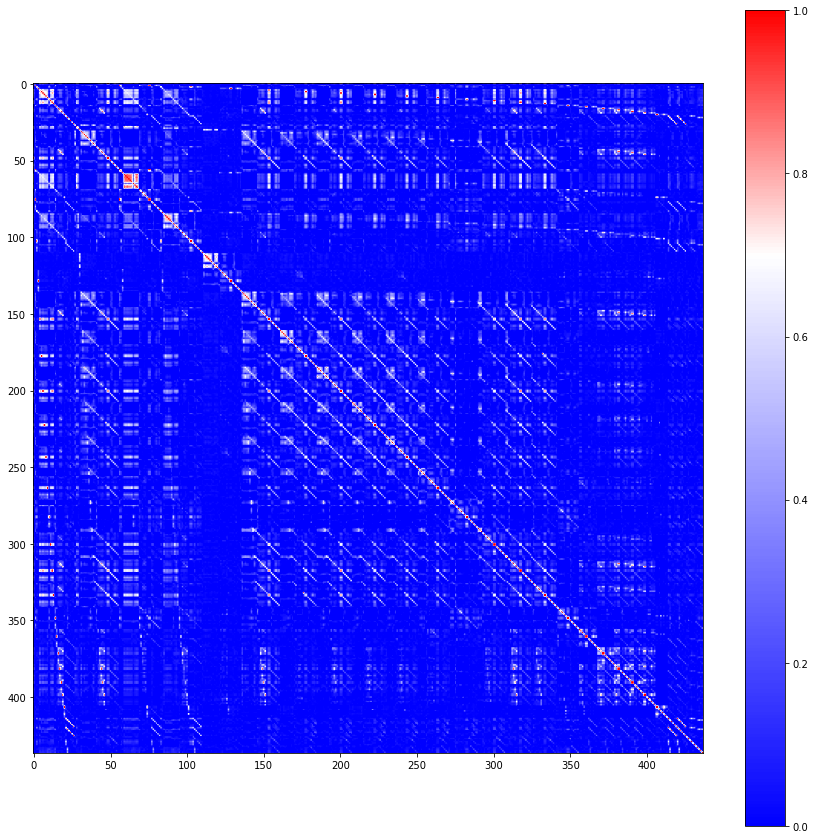

In [52]:
from matplotlib.colors import TwoSlopeNorm
#PLotando 
plt.figure(figsize=(15,15))
plt.imshow(corr_cat,cmap='bwr', norm=TwoSlopeNorm(0.7,vmin=0,vmax=1))
plt.colorbar();

In [54]:
from sklearn.feature_selection import mutual_info_classif

X_train_f3 = X_train_f2.copy()
X_test_f3 = X_test_f2.copy()
dropped = []

for num1,col1 in enumerate(corr_cat.columns):
    if col1 in dropped:
        continue
    for num2,col2 in enumerate(corr_cat.index):
        if col1 in dropped:
            break
        if col2 in dropped:
            continue
        if num2 <= num1:
            continue
        if col1==col2:
            continue
        val = corr_cat.loc[col2,col1]
        if val < .7:
            continue
            
        imm1 = mutual_info_classif(X_train_f3[[col1]],y_train)/mutual_info_classif(y_train.values.reshape(-1,1),y_train)
        imm2 = mutual_info_classif(X_train_f3[[col2]],y_train)/mutual_info_classif(y_train.values.reshape(-1,1),y_train)
        
        if imm1 > imm2:
            dropped.append(col2.strip())
            print(f'Entre {col1} e {col2}, descartamos {col2}')
        else:
            dropped.append(col1.strip())
            print(f'Entre {col1} e {col2}, descartamos {col1}')

X_train_f3 = X_train_f3.drop(dropped,axis=1)
X_test_f3 = X_test_f3.drop(dropped,axis=1)
X_train_f3

Entre Income^1 e MntWines^1, descartamos Income^1
Entre Kidhome^1 e Kidhome^2, descartamos Kidhome^2
Entre Kidhome^1 e Kidhome^1*Z_CostContact^1, descartamos Kidhome^1
Entre Teenhome^1 e Teenhome^2, descartamos Teenhome^1
Entre Recency^1 e Recency^1*Z_CostContact^1, descartamos Recency^1
Entre MntWines^1 e MntMeatProducts^1, descartamos MntWines^1
Entre MntFruits^1 e MntMeatProducts^1, descartamos MntFruits^1
Entre MntMeatProducts^1 e MntFishProducts^1, descartamos MntFishProducts^1
Entre MntMeatProducts^1 e NumCatalogPurchases^1, descartamos NumCatalogPurchases^1
Entre MntMeatProducts^1 e NumStorePurchases^1, descartamos NumStorePurchases^1
Entre MntMeatProducts^1 e Income^1*Z_CostContact^1, descartamos Income^1*Z_CostContact^1
Entre MntMeatProducts^1 e Income^1*Z_Revenue^1, descartamos Income^1*Z_Revenue^1
Entre MntMeatProducts^1 e Kidhome^1*MntMeatProducts^1, descartamos Kidhome^1*MntMeatProducts^1
Entre MntMeatProducts^1 e MntWines^1*Z_CostContact^1, descartamos MntWines^1*Z_CostCo

,MntSweetProducts^1,NumWebVisitsMonth^1,Income^2,Income^1*Teenhome^1,Income^1*MntFruits^1,Income^1*MntFishProducts^1,Income^1*MntSweetProducts^1,Income^1*NumStorePurchases^1,Income^1*AcceptedCmp3^1,Income^1*AcceptedCmp4^1,...,Idade^1*Primeira_Compra^1,Idade^1*Education_2n Cycle^1,Idade^1*Education_Graduation^1,Idade^1*Education_Master^1,Idade^1*Education_PhD^1,Primeira_Compra^2,Primeira_Compra^1*Education_2n Cycle^1,Primeira_Compra^1*Education_Graduation^1,Primeira_Compra^1*Education_Master^1,Primeira_Compra^1*Education_PhD^1
ID,,,,,,,,,,,,,,,,,,,,,
10821,-0.599554,0.649570,0.034439,0.185578,-0.103720,-0.126872,-0.111264,-0.042995,0.000000,0.000000,...,-0.564593,-0.00000,-0.766436,-0.000000,-0.0,0.542650,0.00000,0.736648,0.000000,0.0
5680,-0.503604,0.248576,0.387147,-0.000000,0.347755,0.425380,0.313348,0.526946,-0.000000,-0.000000,...,1.836188,-1.27437,-0.000000,-0.000000,-0.0,2.076078,-1.44086,-0.000000,-0.000000,-0.0
4084,1.583325,-0.553413,0.108646,0.329615,1.080030,0.913982,0.521887,0.531979,0.000000,0.000000,...,0.497462,-0.00000,-0.512469,-0.000000,-0.0,0.942290,-0.00000,-0.970716,-0.000000,-0.0
6983,-0.623542,0.649570,0.283952,-0.532872,0.324894,0.345116,0.332268,0.451285,-0.000000,-0.000000,...,-2.382465,0.00000,0.000000,1.603922,0.0,2.206413,-0.00000,-0.000000,-1.485400,-0.0
8233,-0.527591,-0.152419,0.228327,0.477836,-0.254926,-0.266460,-0.252102,0.183262,0.000000,0.477836,...,-1.628391,0.00000,0.000000,1.603922,0.0,1.030745,-0.00000,-0.000000,-1.015256,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,-0.551579,0.248576,0.298476,-0.000000,0.277590,0.265313,0.301344,0.462682,-0.000000,-0.000000,...,0.641696,-0.00000,-0.597124,-0.000000,-0.0,1.154857,-0.00000,-1.074643,-0.000000,-0.0
10402,-0.623542,1.050564,0.398630,-0.631372,0.400987,0.408910,0.393687,0.534704,-0.000000,-0.000000,...,0.114858,0.00000,0.164776,0.000000,0.0,0.485888,0.00000,0.697057,0.000000,0.0
8977,-0.575567,-0.553413,1.801823,-0.000000,0.784322,0.869358,0.772595,1.136801,-0.000000,-0.000000,...,-1.169265,-0.00000,-0.000000,-0.000000,-0.0,0.740237,0.00000,0.000000,0.000000,0.0


# Finalmente chegamos na regressão logistica 

Regressão Logisitica sem regularização

CUIDADO!!!

**por padrão o modelo de regressão logistica tem regularização L2**

In [55]:
from sklearn.linear_model import  LogisticRegression

lr = LogisticRegression(penalty = 'none', max_iter = 10_000)
lr.fit(X_train_f3, y_train)

LogisticRegression(max_iter=10000, penalty='none')

In [56]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, lr.predict_proba(X_test_f3)[:,1])
auc

0.7487849650349649

In [ ]:
print(f'{"Intercepto":40s} : {lr.intercept_[0]:.1f}')
for col, coef in zip(X_tr_f3.columns,lr.coef_[0]):
    print(f'{col:40s} : {coef:.1f}')

Regularização L1

CUIDADO!!!

**Para usar a regularização L1 é necessário alterar o parâmetro ``` solver ``` da regressão linear**

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {
    'C' : [0.1,1,10,50]
}

lr2 = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 10_000)
grid = GridSearchCV(lr2, params, cv=10, scoring = 'roc_auc', n_jobs = -1, verbose = 10)
grid.fit(X_train_f3, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          solver='saga'),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10, 50]}, scoring='roc_auc',
             verbose=10)

In [58]:
grid.best_params_

{'C': 1}

In [59]:
from sklearn.metrics import roc_auc_score
auc2 = roc_auc_score(y_test, grid.predict_proba(X_test_f3)[:,1])
auc

0.7487849650349649

In [62]:
print(f'{"Intercepto":40s} : {grid.best_estimator_.intercept_[0]:.1f}')
for col, coef in zip(X_train_f3.columns,grid.best_estimator_.coef_[0]):
    print(f'{col:40s} : {coef:.3f}')

Intercepto                               : -0.6
MntSweetProducts^1                       : 0.191
NumWebVisitsMonth^1                      : 0.309
Income^2                                 : -0.005
Income^1*Teenhome^1                      : -0.041
Income^1*MntFruits^1                     : 0.000
Income^1*MntFishProducts^1               : 0.102
Income^1*MntSweetProducts^1              : -0.009
Income^1*NumStorePurchases^1             : 0.000
Income^1*AcceptedCmp3^1                  : -0.041
Income^1*AcceptedCmp4^1                  : 0.012
Kidhome^1*Teenhome^1                     : 0.006
Kidhome^1*Recency^1                      : -0.270
Kidhome^1*MntGoldProds^1                 : 0.000
Kidhome^1*NumDealsPurchases^1            : 0.019
Kidhome^1*NumWebVisitsMonth^1            : 0.060
Kidhome^1*AcceptedCmp3^1                 : -0.014
Kidhome^1*AcceptedCmp4^1                 : 0.000
Kidhome^1*AcceptedCmp5^1                 : 0.000
Kidhome^1*AcceptedCmp1^1                 : 0.000
Kidhome^1*Z_Rev